<a href="https://colab.research.google.com/github/Hasifa1/Machine-learning-models/blob/main/Simple_linear_regression_model_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#1.load the dataset
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Salary_Dataset.csv')#store data in variable df


In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
df.describe()

,YearsExperience,Salary
count,32.000000,32.000000
mean,5.403125,76336.031250
std,2.854254,27252.930037
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.700000,65237.000000
75%,7.975000,102372.000000
max,10.500000,122391.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  32 non-null     float64
 1   Salary           32 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [12]:
df.shape   #shape is not a function()

(35, 2)

2.visualisation-find outliers


In [13]:
df.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [15]:
df.isnull().sum()


YearsExperience    3
Salary             3
dtype: int64

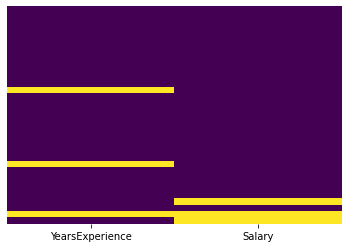

In [16]:
#2.Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()
get_heatmap(df)

3.Preprocessing

Treating the nan values:
1)delete the row
2)replace nan with mean or median of the column

In [17]:
#deleting the records having nan values
#df=df.dropna()

#replacing the values with median of the column
df.YearsExperience
median_years=df['YearsExperience'].median()#to find median of the column


In [18]:
print(median_years)

4.7


In [19]:
mean_sal=df['Salary'].mean()
print(mean_sal)

76336.03125


In [20]:
import math
mean_sal=math.floor(df['Salary'].mean())
print(mean_sal)

76336


In [21]:
#replacing
df['YearsExperience']=df['YearsExperience'].fillna(median_years)
df['Salary']=df['Salary'].fillna(mean_sal)

4.Prepare data

Separate data colums as dependent and independent 
one target column and many attributes

X= store all the independent attributes or colums.
Y= store the target column

>in x store all colums except last column(-1)[::-1]
in y store last column[:1:]






In [39]:
#X -Independent variable -YearsExperience
#Y- Dependent variable  -Salary

X=df['YearsExperience']
Y=df['Salary']
#for feeding ml model we need to feed 2D only
X=df.iloc[:,:-1].values
Y=df.iloc[:,1:].values

In [36]:
#method 2 for loading the data into X and Y
import numpy as np
train_x=df['YearsExperience']#this is not preferred

In [25]:
print(train_x)

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.7
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     4.7
26     9.5
27     9.6
28    10.3
29    10.5
30     9.0
31     4.0
32     4.1
33     4.7
34     9.5
Name: YearsExperience, dtype: float64


In [40]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.7]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 4.7]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [ 9. ]
 [ 4. ]
 [ 4.1]
 [ 4.7]
 [ 9.5]]


In [41]:
print(Y)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]
 [105582.]
 [ 76336.]
 [ 57081.]
 [ 76336.]
 [ 76336.]]


In [27]:
df.isnull().sum().sum()

0

In [28]:
df.isnull().values.any()

False

** 5.Splitting the dataset**

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) #test size is 30%,train size is 70%


In [43]:
X_train

array([[ 9. ],
       [ 6.8],
       [ 7.1],
       [10.5],
       [ 4.9],
       [ 4. ],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 3.2],
       [ 1.1],
       [ 5.1],
       [ 4. ],
       [ 2.9],
       [ 6. ],
       [ 4.7],
       [ 5.3],
       [ 4. ],
       [10.3],
       [ 3.2],
       [ 9.5],
       [ 3.7],
       [ 7.9],
       [ 4.5]])

In [44]:
X_test


array([[4.7],
       [5.9],
       [1.5],
       [9.6],
       [1.3],
       [4.7],
       [2. ],
       [8.2],
       [3. ],
       [8.7],
       [2.2]])

**Training**
6.Fitting the algorithm/feeding the model

Linear regression
sklearn.linear_model.LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()#storing in model


Fitting the **data**

In [46]:
model.fit(X_train,Y_train)

LinearRegression()

**7.Testing the data**

In [47]:
y_pred=model.predict(X_test)#testing with x_test

**8.Model evaluation**

In [48]:
import matplotlib.pyplot as plt

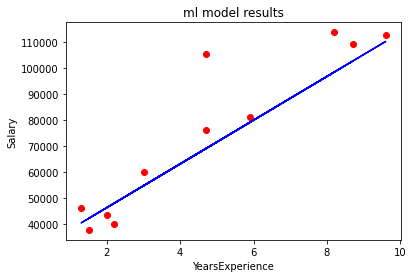

In [51]:
#visualising the test result
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('ml model results')
plt.show()

In [53]:
accuracy=model.score(X_test,y_pred)
print(accuracy)

1.0


In [54]:
y_predtrain=model.predict(X_train)

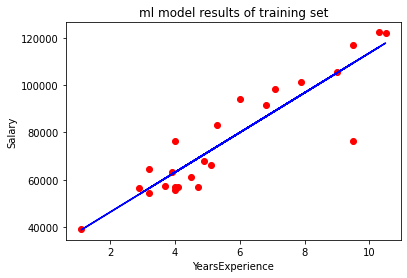

In [55]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,y_predtrain,color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('ml model results of training set')
plt.show()

In [56]:
accuracy=model.score(X_train,y_predtrain)
print(accuracy)

1.0


**9.Deployment**

In [65]:
years=float(input('enter the experience '))
y_res=model.predict([[years]])
print('salary estimated by model is:',math.floor(y_res))

enter the experience 1
salary estimated by model is: 37909


In [58]:
years=input('enter the experience ')
years=np.asarray(years)
years=years.reshape(1,-1)
prediction=model.predict(years)
print(prediction)

enter 2
[[46320.26290184]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [59]:
print(model.score(X,Y)*100)

82.24123039116645


In [61]:
print(model.score(X_train,Y_train)*100)

83.00993025536279


In [62]:
print(model.score(X_test,Y_test)*100)

81.15493509241874
